In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-07-10 17:55:22.407363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 269s 2us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

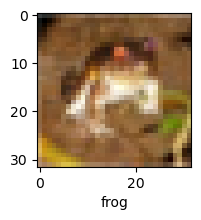

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Making an ANN first

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8136 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6255 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5418 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4833 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4315 - accuracy: 0.4968


In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.59      0.53      1000
           1       0.76      0.29      0.42      1000
           2       0.47      0.20      0.28      1000
           3       0.40      0.28      0.33      1000
           4       0.43      0.40      0.41      1000
           5       0.44      0.31      0.36      1000
           6       0.57      0.47      0.51      1000
           7       0.31      0.83      0.45      1000
           8       0.74      0.35      0.47      1000
           9       0.43      0.71      0.54      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



# Building a CNN

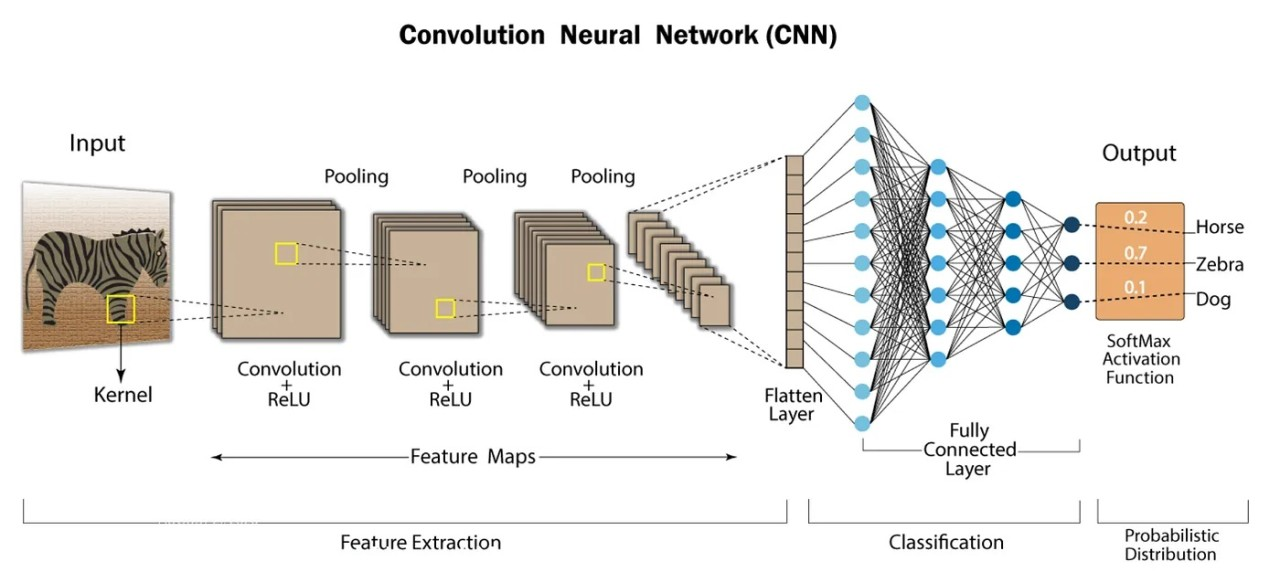

## CNN basics and terminologies

### 1. Filter/Kernel

A filter, or kernel, in a CNN is a small matrix of weights that slides over the input data (such as an image), performs element-wise multiplication with the part of the input it is currently on, and then sums up all the results into a single output pixel. This process is known as convolution.

### 2. Padding

There are two problems arises with convolution:

    (i) Every time after convolution operation, original image size getting shrinks, as we have seen in above example six by six down to four by four and in image classification task there are multiple convolution layers so after multiple convolution operation, our original image will really get small but we don’t want the image to shrink every time.
    
    (ii) When kernel moves over original images, it touches the edge of the image less number of times and touches the middle of the image more number of times and it overlaps also in the middle. So, the corner features of any image or on the edges aren’t used much in the output.

So if a 𝑛∗𝑛 matrix convolved with an f*f matrix the with padding p then the size of the output image will be (n + 2p — f + 1) * (n + 2p — f + 1) where p =1 in this case.

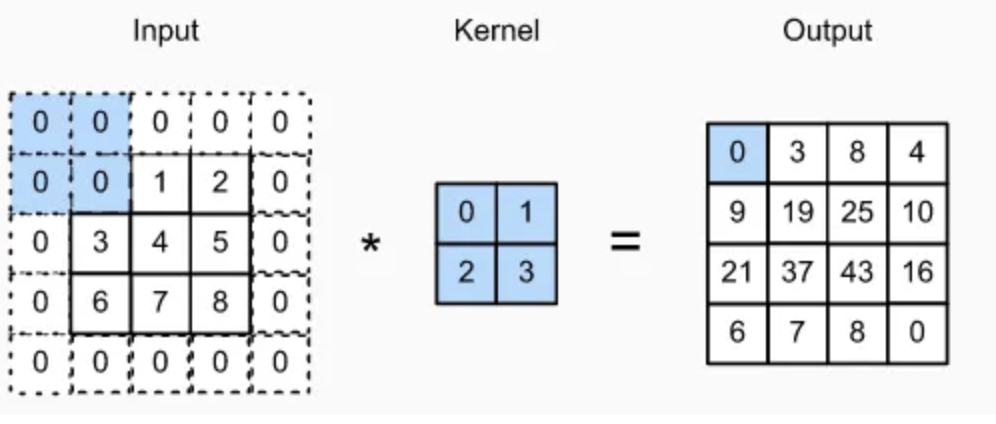

### 3. Stride

Stride is the number of pixels shifts over the input matrix. For padding p, filter size 𝑓∗𝑓 and input image size 𝑛 ∗ 𝑛 and stride ‘𝑠’ our output image dimension will be [ {(𝑛 + 2𝑝 − 𝑓 + 1) / 𝑠} + 1] ∗ [ {(𝑛 + 2𝑝 − 𝑓 + 1) / 𝑠} + 1].

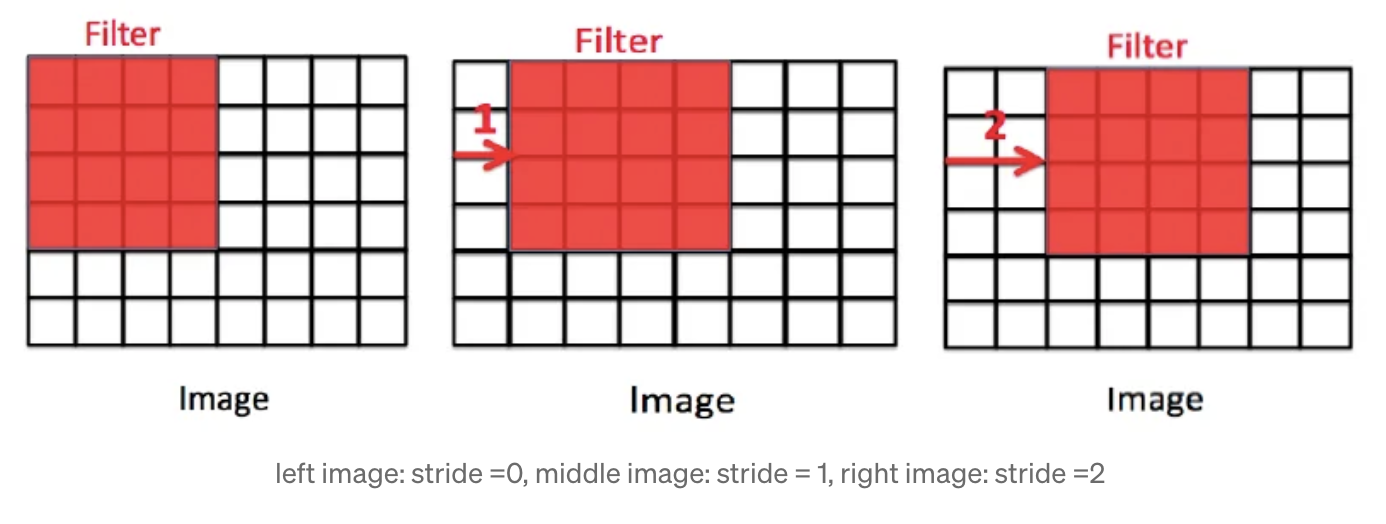

### 4. Pooling

A pooling layer is another building block of a CNN. Pooling Its function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.

There are 2 types of pooling:

#### (i) Max pooling

Max pooling is simply a rule to take the maximum of a region and it helps to proceed with the most important features from the image. Max pooling selects the brighter pixels from the image

#### (ii) Average Pooling

Average Pooling is different from Max Pooling in the sense that it retains much information about the “less important” elements of a block, or pool.

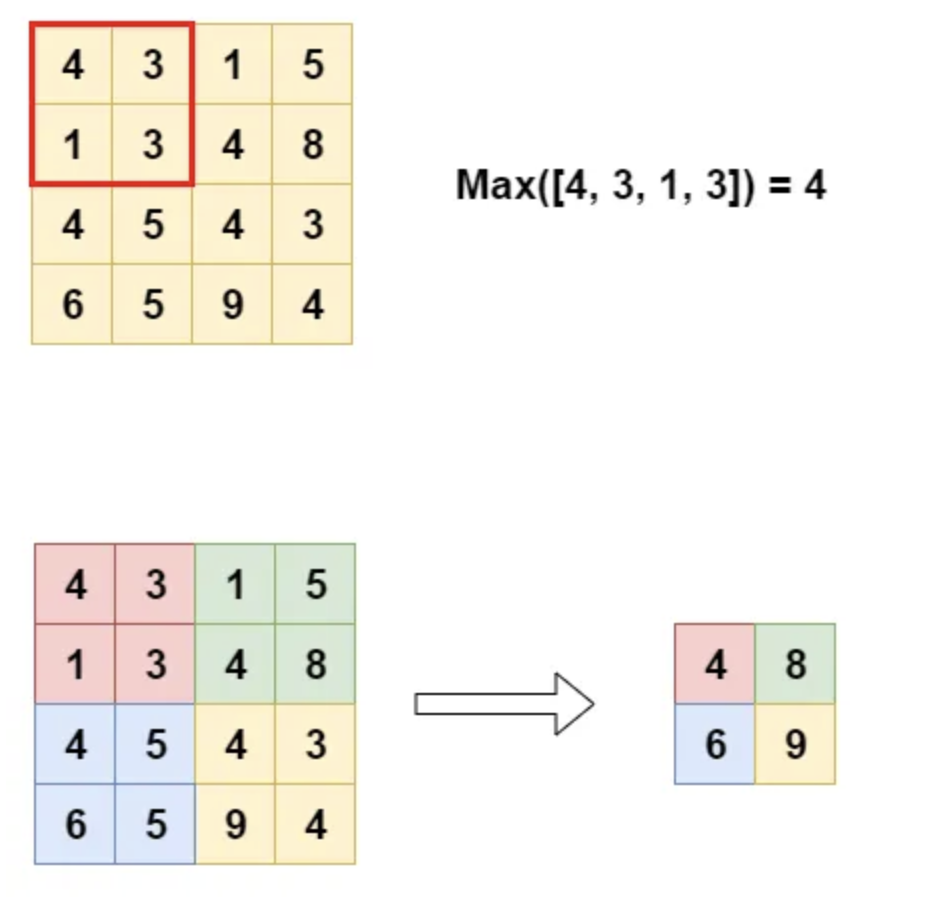

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### tf.keras.layers.Conv2D()

#### Link:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

#### Code:

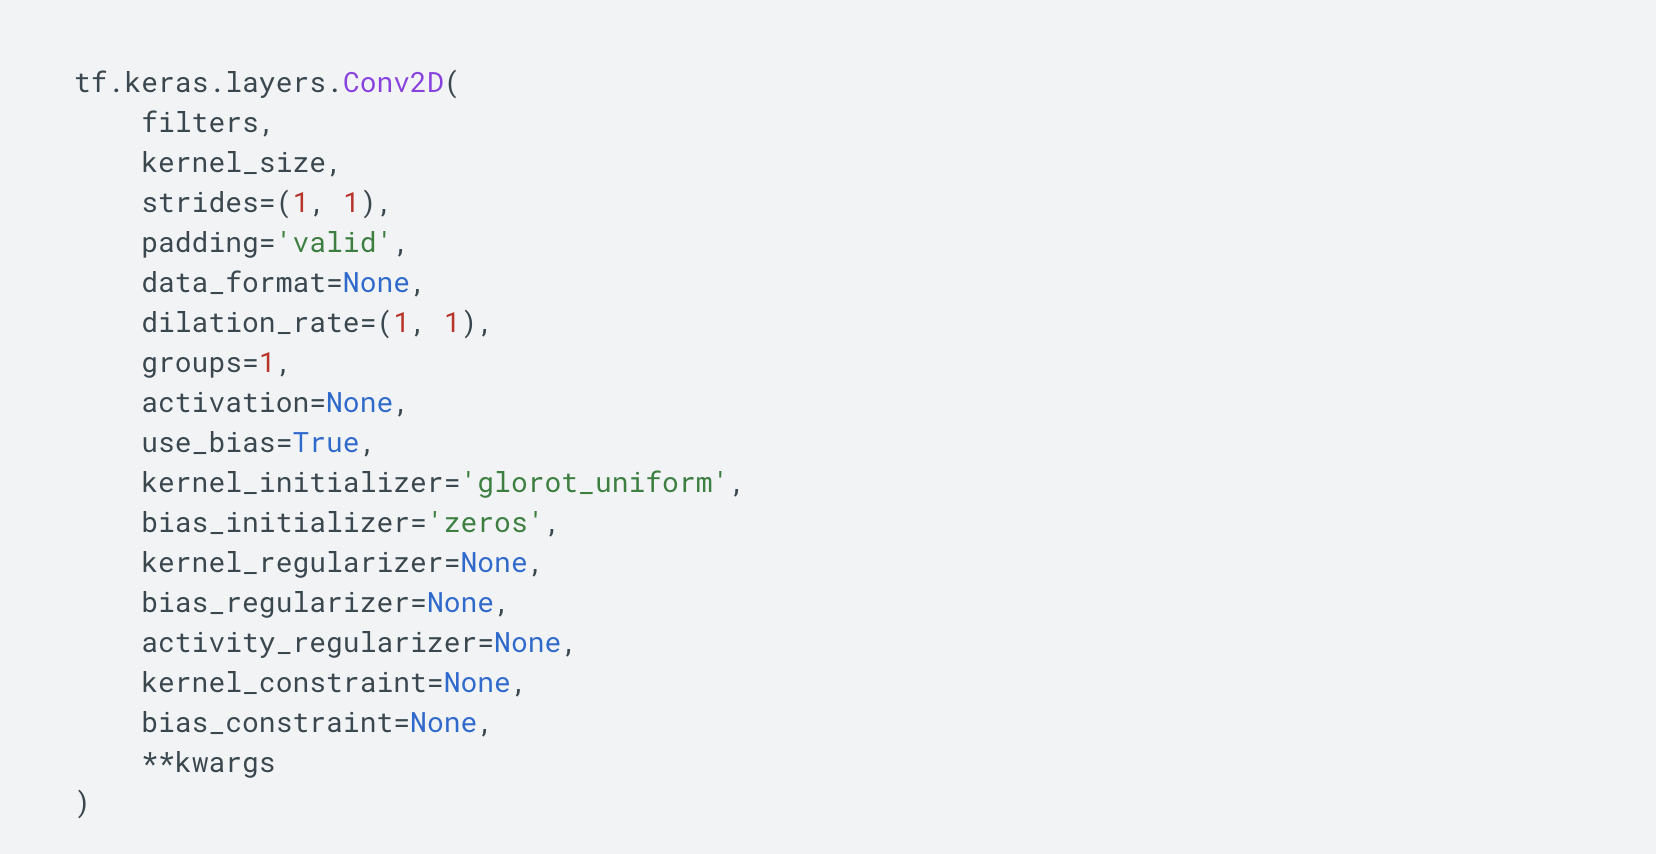


### tf.keras.layers.MaxPool2D()

#### Link:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

#### Code:

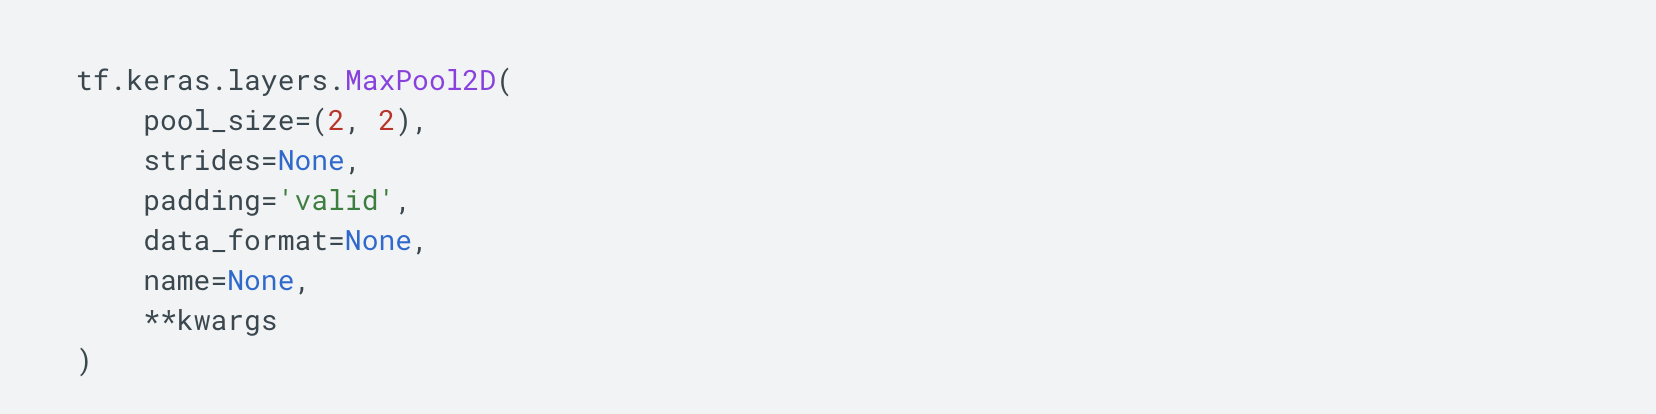

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4374 - accuracy: 0.4830
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0776 - accuracy: 0.6232
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9474 - accuracy: 0.6691
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8564 - accuracy: 0.7014
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7854 - accuracy: 0.7262
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7283 - accuracy: 0.7449
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6747 - accuracy: 0.7652
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6235 - accuracy: 0.7827
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5816 - accuracy: 0.7978
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9101 - accuracy: 0.7052


[0.9100509881973267, 0.7052000164985657]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.86407787e-02, 5.60018746e-03, 7.93219137e-04, 7.26926625e-01,
        2.56400508e-05, 1.49666727e-01, 1.58207573e-03, 2.01765541e-03,
        4.54893373e-02, 3.92578281e-02],
       [1.33966489e-04, 8.30698833e-02, 9.64657509e-09, 1.58794755e-08,
        4.86300644e-09, 5.81560078e-11, 1.70353456e-08, 2.17402096e-09,
        9.16736841e-01, 5.92491779e-05],
       [1.20649658e-01, 1.01368845e-01, 2.32129591e-03, 4.43985499e-03,
        1.00727787e-03, 1.97266672e-05, 5.01755057e-05, 4.04058956e-04,
        7.63953626e-01, 5.78544382e-03],
       [9.58253443e-01, 2.44832336e-04, 1.28588630e-02, 2.30058562e-03,
        6.42024912e-04, 3.41141131e-05, 3.98971344e-04, 4.39646625e-04,
        2.47591157e-02, 6.84144761e-05],
       [1.75964692e-06, 1.79118491e-04, 1.10553792e-02, 6.84428448e-03,
        9.52163458e-01, 4.21884790e-04, 2.84321159e-02, 3.22209144e-06,
        8.97746126e-04, 8.67893448e-07]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

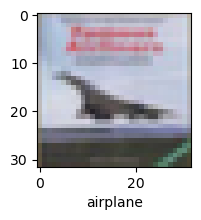

In [21]:
plot_sample(X_test, y_test,3)